# Read data from csv file

In [106]:
import pandas as pd
import numpy as np

df = pd.read_csv("Melbourne_Housing.csv")

df.shape

C:\Users\User\AppData\Local\Temp\ipykernel_20180\4038133987.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Melbourne_Housing.csv")


(34857, 22)

# Check missing data in csv file

In [107]:
def check_missing_value(data):
    missing_like_values = [
        "NaN", "nan", "NA", "N/A", "na", "null", "Null", "NULL",
        "missing", "Missing", "MISSING", "inf", "Inf", "INF", "∞", "-inf"
    ]
    # replace all missing value to NaN
    df = data.replace(missing_like_values, np.nan)
    df = df.replace([np.inf, -np.inf], np.nan)

    # check how many column with mssing values
    missing_count = df.isna().sum()
    missing_percent = (missing_count / len(df)) * 100

    missing_table = (
        pd.DataFrame({
            "Missing Count": missing_count[missing_count > 0],
            "Missing %": missing_percent[missing_percent > 0].round(2)
        })
        .sort_values(by="Missing %", ascending=False)
    )

    print("The number of column with missing values", len(missing_table))
    print(missing_table.head(df.shape[1]))

check_missing_value(df)

The number of column with missing values 13
               Missing Count  Missing %
BuildingArea           21115      60.58
YearBuilt              19306      55.39
Landsize               11810      33.88
Car                     8728      25.04
Bathroom                8226      23.60
Bedroom                 8217      23.57
Latitude                7976      22.88
Longtitude              7976      22.88
Price                   7610      21.83
CouncilArea                3       0.01
Propertycount              3       0.01
Postcode                   1       0.00
Distance                   1       0.00


# Delete all data with missing value for councilarea,propertycount,distance,postcode and price

In [108]:
cols_to_drop_na = ["Price", "CouncilArea", "Propertycount", "Distance", "Postcode"]
df = df.dropna(subset=cols_to_drop_na)

check_missing_value(df)
df.shape

The number of column with missing values 8
              Missing Count  Missing %
BuildingArea          16588      60.89
YearBuilt             15160      55.65
Landsize               9262      34.00
Car                    6821      25.04
Bathroom               6444      23.65
Bedroom                6438      23.63
Latitude               6251      22.94
Longtitude             6251      22.94


(27244, 22)

# Using mean value of Latitude and Longtiitude in same suburb and regionname fill in the msissing value

In [109]:
df["Latitude"] = df.groupby(["Suburb", "Regionname"])["Latitude"].transform(
    lambda x: x.fillna(x.mean())
)

df["Longtitude"] = df.groupby(["Suburb", "Regionname"])["Longtitude"].transform(
    lambda x: x.fillna(x.mean())
)

# some combination still have missing value
df["Latitude"].fillna(df["Latitude"].mean(), inplace=True)
df["Longtitude"].fillna(df["Longtitude"].mean(), inplace=True)

check_missing_value(df)


The number of column with missing values 6
              Missing Count  Missing %
BuildingArea          16588      60.89
YearBuilt             15160      55.65
Landsize               9262      34.00
Car                    6821      25.04
Bathroom               6444      23.65
Bedroom                6438      23.63


C:\Users\User\AppData\Local\Temp\ipykernel_20180\745640852.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Latitude"].fillna(df["Latitude"].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_20180\745640852.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# Fill in missing value in bedroom and Bathroom

In [110]:
# using rooms number fill in missing value in bedroom
df["Bedroom"].fillna(df["Rooms"], inplace=True)

# group by bedroom，calculate avg for bathroom
bedroom_group_mean = df.groupby("Bedroom")["Bathroom"].mean()

print(bedroom_group_mean)

df["Bathroom"] = df.groupby(["Bedroom"])["Bathroom"].transform(
    lambda x: x.fillna(x.mean())
)

check_missing_value(df)

Bedroom
0.0     0.937500
1.0     1.015385
2.0     1.142036
3.0     1.487890
4.0     2.058564
5.0     2.685336
6.0     3.054545
7.0     3.000000
8.0     3.777778
9.0     7.000000
10.0    6.000000
12.0    5.000000
16.0    8.000000
20.0    1.000000
Name: Bathroom, dtype: float64
The number of column with missing values 4
              Missing Count  Missing %
BuildingArea          16588      60.89
YearBuilt             15160      55.65
Landsize               9262      34.00
Car                    6821      25.04


C:\Users\User\AppData\Local\Temp\ipykernel_20180\2391169290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bedroom"].fillna(df["Rooms"], inplace=True)


# Tempory store data

In [111]:
df.to_csv("cleaned_melbourne_housing.csv", index=False)

# View the car value distribution

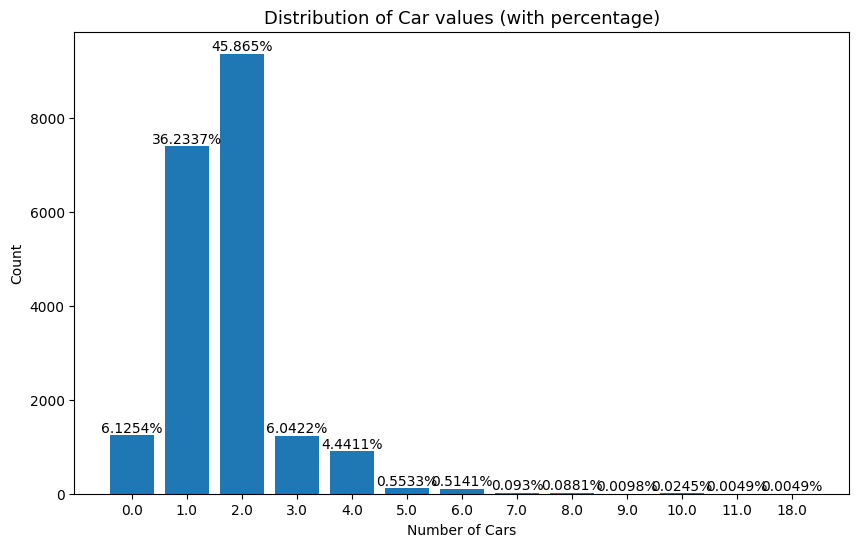

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("cleaned_melbourne_housing.csv")

# delete missing value
car_series = df["Car"].dropna()

# store persentage
counts = car_series.value_counts().sort_index()
percentages = (counts / counts.sum() * 100).round(4)

# plot value distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index.astype(str), counts.values)

for bar, pct in zip(bars, percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,      
        bar.get_height(),                       
        f"{pct}%",                              
        ha="center", va="bottom"
    )

plt.title("Distribution of Car values (with percentage)", fontsize=13)
plt.xlabel("Number of Cars")
plt.ylabel("Count")
plt.show()


# View the distribution for type 

Car    0.0    1.0    2.0    3.0
Type                           
h     6.85  26.39  51.64  15.11
t     1.27  41.53  54.34   2.85
u     5.11  77.25  16.54   1.09


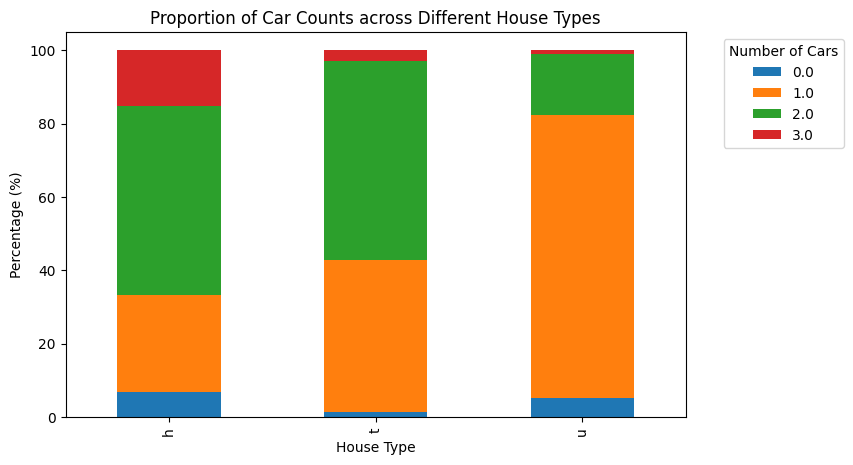

In [113]:
df = df[["Type", "Car"]].dropna()
df.loc[df["Car"] >= 3, "Car"] = 3  # all greater than 3 using 3 instead

ratio_table = (
    df.groupby("Type")["Car"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .mul(100)
    .round(2)
    .unstack(fill_value=0)
)

print(ratio_table)

import matplotlib.pyplot as plt

ratio_table.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
)

plt.title("Proportion of Car Counts across Different House Types")
plt.xlabel("House Type")
plt.ylabel("Percentage (%)")
plt.legend(title="Number of Cars", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(False)
plt.show()

# Train a linear regression model to predict car value and verify performance

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

def predict_car_with_LR(data):
    features = ["Rooms", "Bedroom", "Bathroom", "Type","Distance", "Price"]
    target = "Car"

    # drop missing values
    data = data[features + [target]].dropna().copy()


    # using one hot preprocess type values
    data = pd.get_dummies(data, columns=["Type"])

    
    X = data.drop(columns=[target])
    y = data["Car"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print("MAE:", round(mae, 3))
    print("RMSE:", round(rmse, 3))
    print("R²:", round(r2, 3))

def predict_car_with_LoR(data):
    features = ["Rooms", "Bedroom", "Bathroom", "Type","Distance","Price"]
    target = "Car"

    # drop missing values
    data = data[features + [target]].dropna().copy()

    # using one hot preprocess type values
    data = pd.get_dummies(data, columns=["Type"])

    X = data.drop(columns=[target])
    y = data["Car"]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    model = LogisticRegression(max_iter=1000, multi_class="multinomial")
    model.fit(X_train_scaled, y_train)

    print("Lor predict accuracy: " + str(round(model.score(X_test_scaled, y_test) * 100, 3)) + " %")

df = pd.read_csv("cleaned_melbourne_housing.csv")
df.loc[df["Car"] >= 3, "Car"] = 3 
predict_car_with_LR(df)
predict_car_with_LoR(df)

MAE: 0.516
RMSE: 0.676
R²: 0.245
Lor predict accuracy: 59.143 %


c:\Users\User\anaconda3\envs\torch-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Classify Car column with Low, Mid and high, using one-hot to deal with

In [115]:
import pandas as pd


df = pd.read_csv("cleaned_melbourne_housing.csv")

# fill in 1 to missing value
df["Car"].fillna(1, inplace=True) 


df.loc[df["Car"] >= 3, "Car"] = 3


df["car_low"] = (df["Car"] == 0).astype(int)
df["car_mid"] = ((df["Car"] >= 1) & (df["Car"] <= 2)).astype(int)
df["car_high"] = (df["Car"] >= 3).astype(int)

# delete car col
df = df.drop(columns=["Car"])
check_missing_value(df)

df.to_csv("fillin_car_mis_value.csv", index=False)


The number of column with missing values 3
              Missing Count  Missing %
BuildingArea          16588      60.89
YearBuilt             15160      55.65
Landsize               9262      34.00


C:\Users\User\AppData\Local\Temp\ipykernel_20180\1336883630.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Car"].fillna(1, inplace=True)


# View distribution of Yearbuild

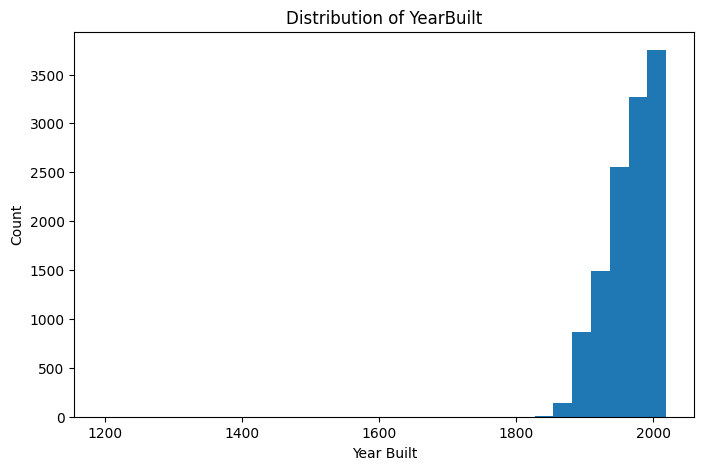

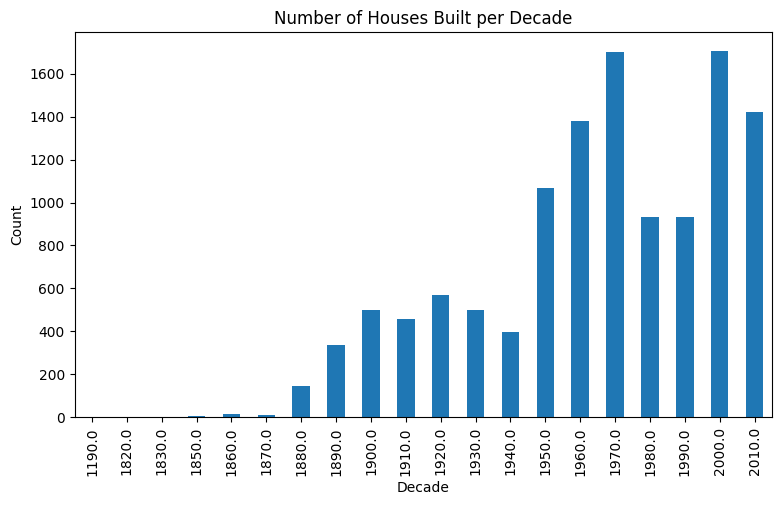

In [116]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("fillin_car_mis_value.csv")


plt.figure(figsize=(8,5))
df["YearBuilt"].hist(bins=30)
plt.title("Distribution of YearBuilt")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.grid(False)
plt.show()

# drop missing value
year_data = df["YearBuilt"].dropna().astype(int)

# divide year to decade
df["Decade"] = (year_data // 10) * 10

decade_counts = df["Decade"].value_counts().sort_index()

plt.figure(figsize=(9,5))
decade_counts.plot(kind="bar")
plt.title("Number of Houses Built per Decade")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.grid(False)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



df = pd.read_csv("fillin_car_mis_value.csv")


features = ["Rooms", "Bedroom", "Bathroom", "Distance", "Type", "Price","Propertycount","Postcode", "car_low","car_mid","car_high"]
target = "YearBuilt"

# delete missing values
df = df[features + [target]].dropna().copy()

df = pd.get_dummies(df, columns=["Type"])


df["YearBuilt_bin"], bins = pd.qcut(df["YearBuilt"], q=4, labels=["old", "mod", "new_mod", "new"], retbins=True)


print(df["YearBuilt_bin"].value_counts(normalize=True) * 100)


# only need to predict year_bin
X = df.drop(columns=["YearBuilt", "YearBuilt_bin"])
y = df["YearBuilt_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=75, weights="distance",metric= "manhattan")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%\n")



YearBuilt_bin
old        31.305859
new_mod    23.245614
mod        23.179411
new        22.269116
Name: proportion, dtype: float64

Accuracy: 59.66%



# Predict yearbuilt_bin for missing values

In [ ]:
df_full = pd.read_csv("fillin_car_mis_value.csv")
print(df_full.shape)

# mapping yearbuilt with bins
df_full["YearBuilt_bin"] = pd.cut(
    df_full["YearBuilt"],
    bins=bins, 
    labels=["old", "mod", "new_mod", "new"],
    include_lowest=True
)

df_full = df_full.drop(columns=["YearBuilt"])

df_known = df_full[df_full["YearBuilt_bin"].notna()].copy()
df_missing = df_full[df_full["YearBuilt_bin"].isna()].copy()
df_missing_copy = df_missing.copy()



# predict using knn model
df_missing = pd.get_dummies(df_missing, columns=["Type"])
X_missing = df_missing[X.columns]
X_missing_scaled = scaler.transform(X_missing)
y_missing_pred = knn.predict(X_missing_scaled)

# concat
df_missing_copy["YearBuilt_bin"] = y_missing_pred

df_filled = pd.concat([df_known, df_missing_copy], axis=0)
df_filled.sort_index(inplace=True)
print(df_filled.shape)
print(df_filled.columns)
print(df_filled.shape)


check_missing_value(df_filled)

(27244, 24)
(27244, 24)
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Latitude', 'Longtitude', 'Regionname',
       'Propertycount', 'ParkingArea', 'Price', 'car_low', 'car_mid',
       'car_high', 'YearBuilt_bin'],
      dtype='object')
(27244, 24)
The number of column with missing values 2
              Missing Count  Missing %
BuildingArea          16588      60.89
Landsize               9262      34.00


In [139]:
df = pd.get_dummies(df_filled, columns=["Type", "YearBuilt_bin"], drop_first=False)

df.to_csv("one_hot_yearbuiltAndtype.csv", index=False)



# View data for land size

In [201]:

df = pd.read_csv("one_hot_yearbuiltAndtype.csv")

df = df[["Landsize", "Rooms", "Bedroom", "Bathroom", "Distance", "Price", "Type_h", "Type_t", "Type_u"]].copy()


df["Landsize"] = pd.to_numeric(df["Landsize"], errors="coerce")
df["Landsize"].replace(0, np.nan, inplace=True)
df.dropna(subset=["Landsize"], inplace=True)

df.shape



C:\Users\User\AppData\Local\Temp\ipykernel_20180\2155854107.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Landsize"].replace(0, np.nan, inplace=True)


(16040, 9)

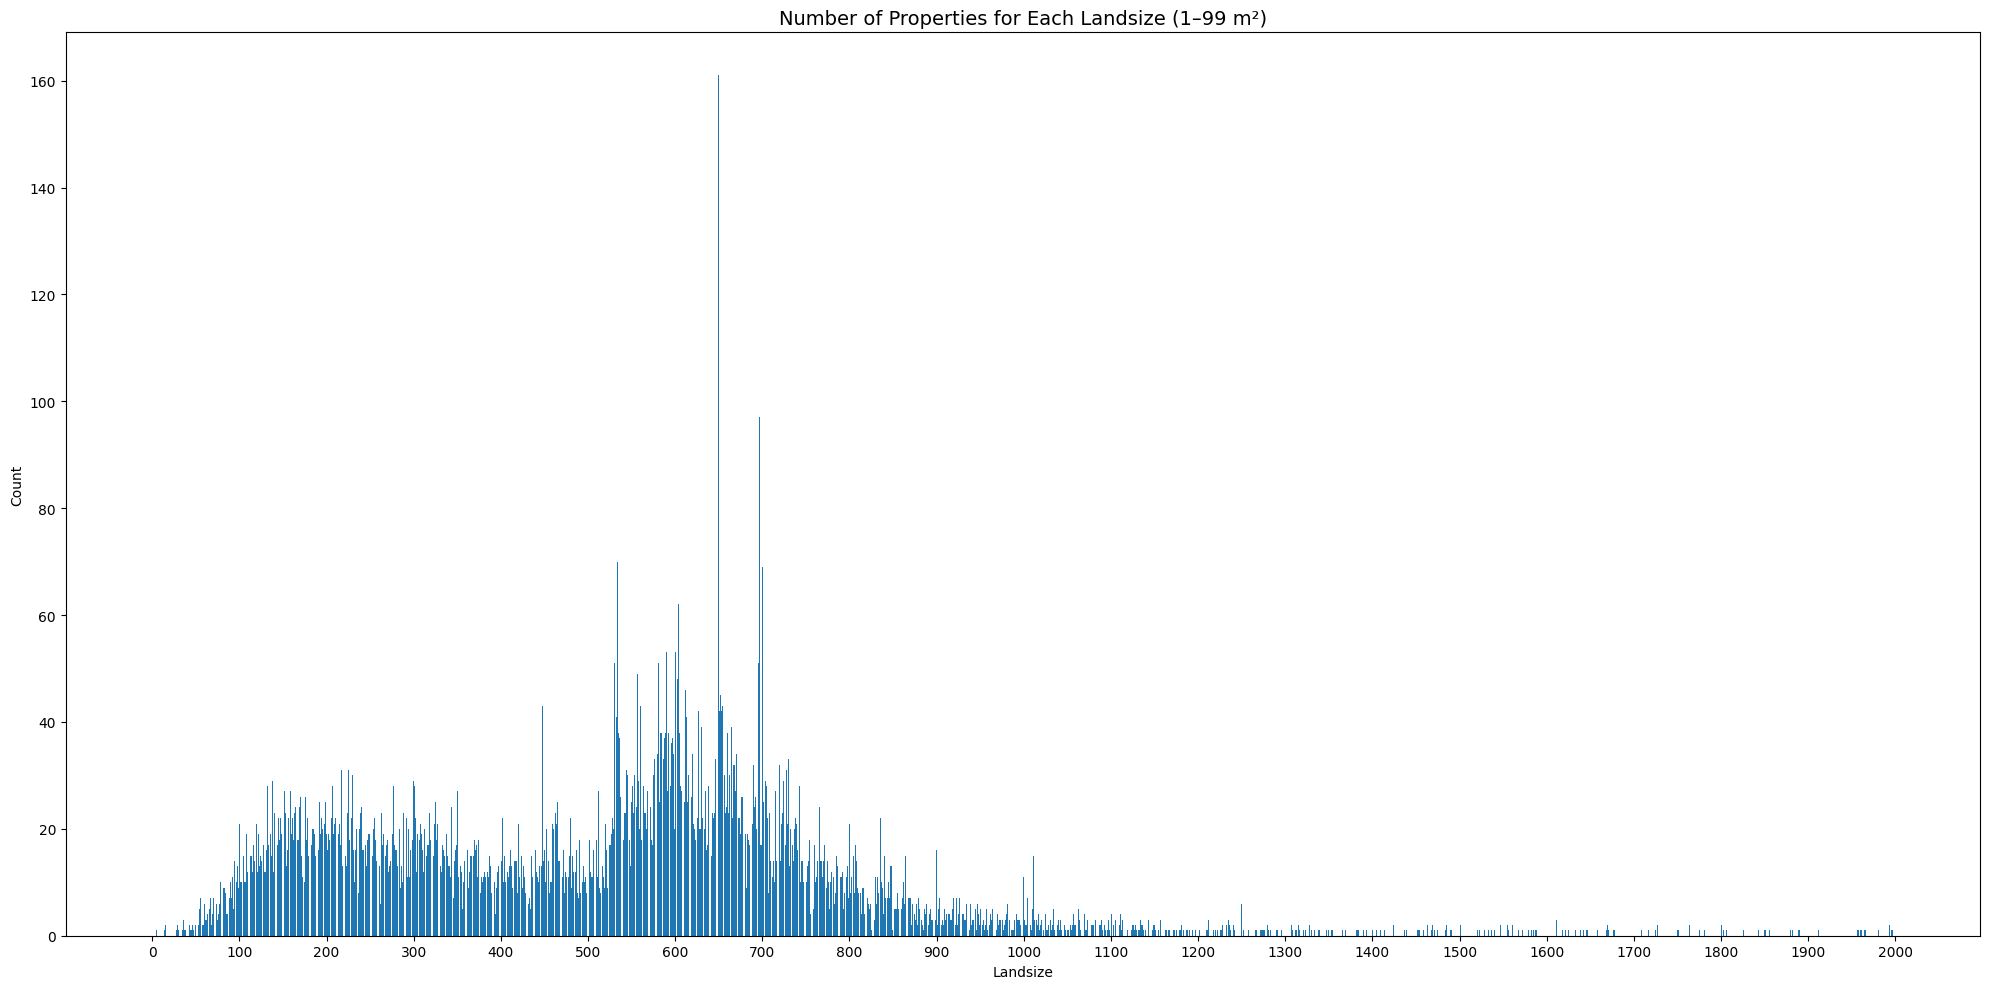

In [202]:
landsizes = df[df["Landsize"] < 2000]["Landsize"].astype(int)

size_counts = landsizes.value_counts().sort_index()


plt.figure(figsize=(20,10))
plt.bar(size_counts.index, size_counts.values)
plt.title("Number of Properties for Each Landsize (1–99 m²)", fontsize=14)
plt.xlabel("Landsize")
plt.ylabel("Count")
plt.xticks(np.arange(0, 2001, 100))
plt.tight_layout()
plt.show()


# Using knn to predict

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

bins = [0, 100, 300, 600, 1000, 2000, np.inf]
labels = ["tiny", "small", "medium", "large", "xlarge", "huge"]

df["Landsize_bin"] = pd.cut(df["Landsize"], bins=bins, labels=labels, right=False)

# view the persentage for each bins
print(df["Landsize_bin"].value_counts(normalize=True) * 100)

features = ["Rooms", "Bedroom", "Bathroom", "Distance", "Price", "Type_h", "Type_t", "Type_u"]
target = "Landsize_bin"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=75, weights="distance", metric="manhattan")
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc*100:.2f}%\n")


Landsize_bin
large     35.554863
medium    34.426434
small     22.512469
xlarge     3.640898
tiny       2.088529
huge       1.776808
Name: proportion, dtype: float64

Accuracy: 61.53%



In [220]:


df_full = pd.read_csv("one_hot_yearbuiltAndtype.csv")

df_full["Landsize"] = pd.to_numeric(df_full["Landsize"], errors="coerce").replace(0, np.nan)


df_full["Landsize_bin"] = pd.cut(
    df_full["Landsize"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


df_known = df_full[df_full["Landsize_bin"].notna()].copy()
df_missing = df_full[df_full["Landsize_bin"].isna()].copy()
df_missing_copy = df_missing.copy()

df_missing = df_missing[features]

print(df_missing_copy.shape)
print(df_missing_copy.columns)


X_missing_scaled = scaler.transform(df_missing)
y_missing_pred = knn.predict(X_missing_scaled)


df_missing_copy["Landsize_bin"] = y_missing_pred


df_filled = pd.concat([df_known, df_missing_copy], axis=0)
df_filled.sort_index(inplace=True)
df_filled = df_filled.drop(columns=["Landsize"])

check_missing_value(df_filled)




(11204, 30)
Index(['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom', 'Bathroom', 'Landsize', 'BuildingArea',
       'CouncilArea', 'Latitude', 'Longtitude', 'Regionname', 'Propertycount',
       'ParkingArea', 'Price', 'car_low', 'car_mid', 'car_high', 'Type_h',
       'Type_t', 'Type_u', 'YearBuilt_bin_mod', 'YearBuilt_bin_new',
       'YearBuilt_bin_new_mod', 'YearBuilt_bin_old', 'Landsize_bin'],
      dtype='object')
The number of column with missing values 1
              Missing Count  Missing %
BuildingArea          16588      60.89


In [221]:
df_filled = pd.get_dummies(df_filled, columns=["Landsize_bin"])

df_filled.to_csv("filled_landsize_bin.csv", index=False)

# View data for BuildingArea

In [227]:
df = pd.read_csv("filled_landsize_bin.csv")

print(df.columns)

df = df[['Rooms', 'Distance',
       'Postcode', 'Bedroom', 'Bathroom', 'BuildingArea', 'car_low', 'car_mid', 'car_high', 'Type_h', 'Type_t', 'Type_u',
       'YearBuilt_bin_mod', 'YearBuilt_bin_new', 'YearBuilt_bin_new_mod',
       'YearBuilt_bin_old', 'Landsize_bin_huge', 'Landsize_bin_large',
       'Landsize_bin_medium', 'Landsize_bin_small', 'Landsize_bin_tiny',
       'Landsize_bin_xlarge']].copy()


df["BuildingArea"] = pd.to_numeric(df["BuildingArea"], errors="coerce")
df["BuildingArea"].replace(0, np.nan, inplace=True)
df.dropna(subset=["BuildingArea"], inplace=True)

df.shape


Index(['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance',
       'Postcode', 'Bedroom', 'Bathroom', 'BuildingArea', 'CouncilArea',
       'Latitude', 'Longtitude', 'Regionname', 'Propertycount', 'ParkingArea',
       'Price', 'car_low', 'car_mid', 'car_high', 'Type_h', 'Type_t', 'Type_u',
       'YearBuilt_bin_mod', 'YearBuilt_bin_new', 'YearBuilt_bin_new_mod',
       'YearBuilt_bin_old', 'Landsize_bin_huge', 'Landsize_bin_large',
       'Landsize_bin_medium', 'Landsize_bin_small', 'Landsize_bin_tiny',
       'Landsize_bin_xlarge'],
      dtype='object')


C:\Users\User\AppData\Local\Temp\ipykernel_20180\1564452026.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("filled_landsize_bin.csv")
C:\Users\User\AppData\Local\Temp\ipykernel_20180\1564452026.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BuildingArea"].replace(0, np.nan, inplace=True)


(10600, 22)

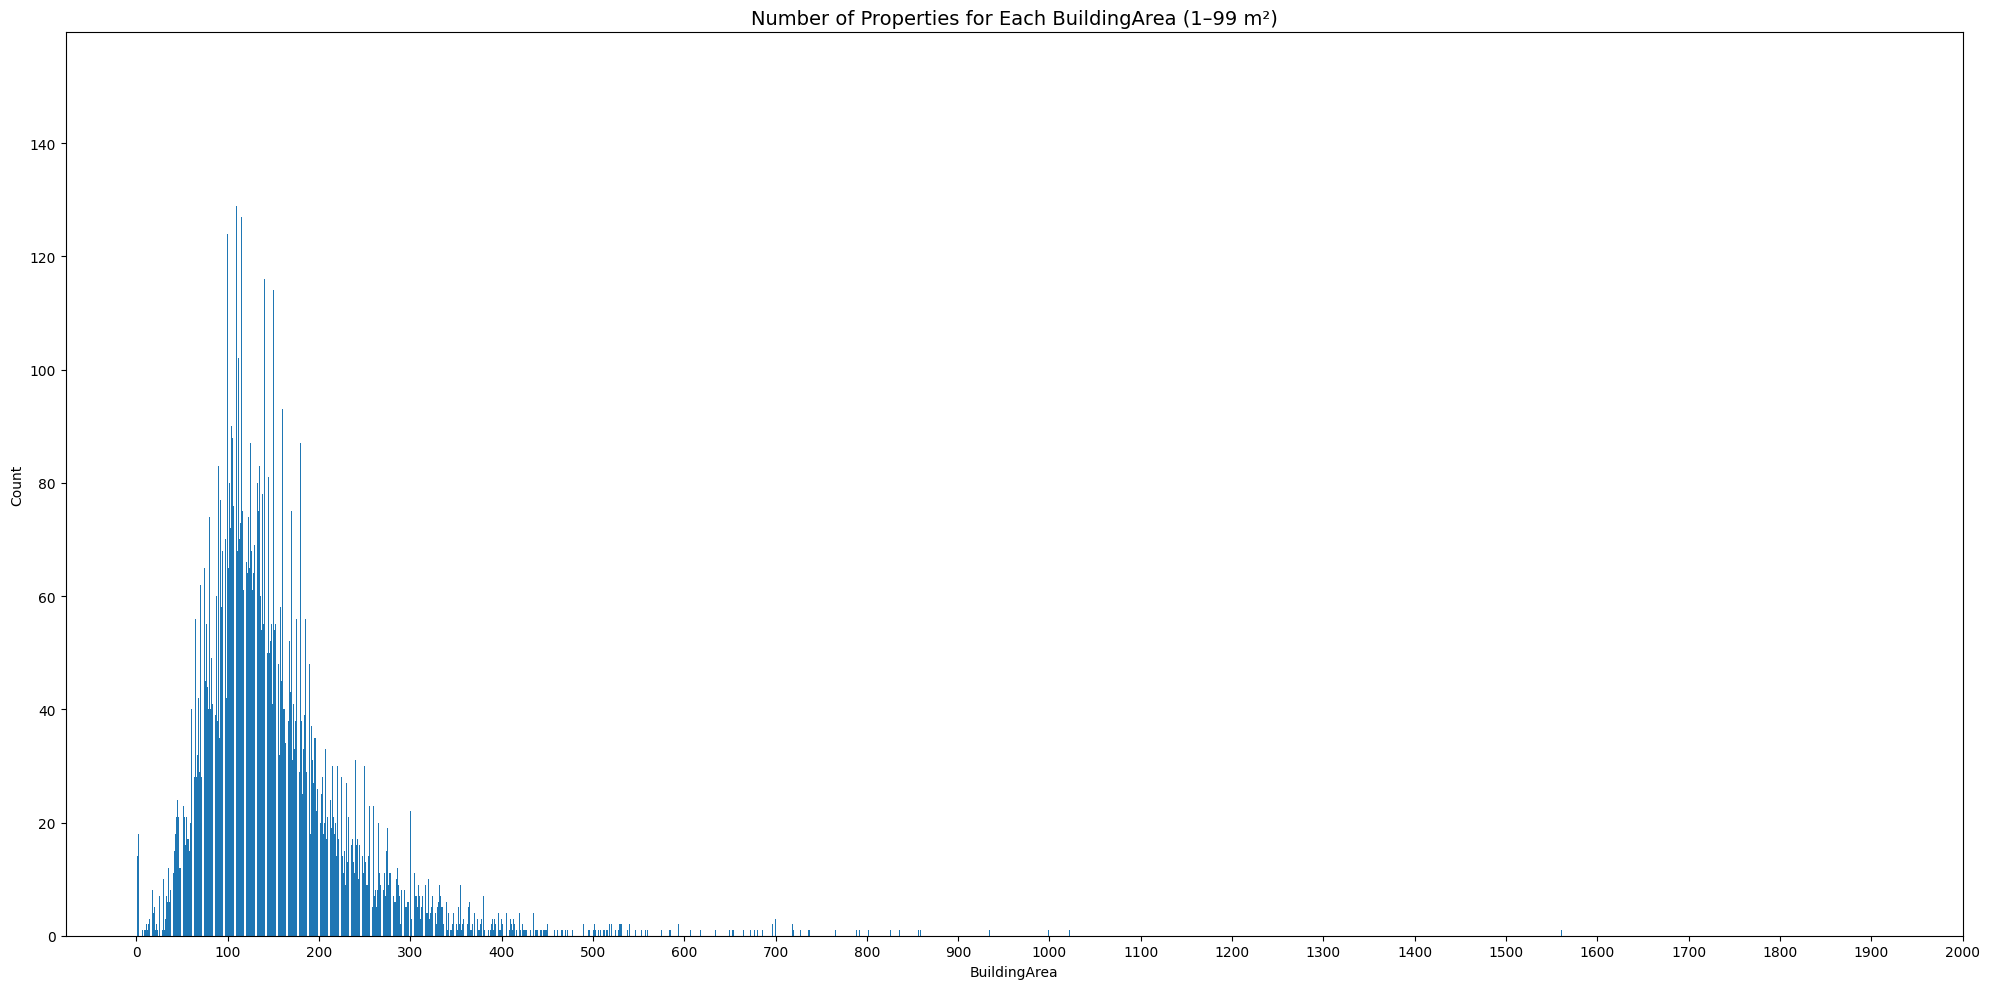

In [228]:
BuildingArea = df[df["BuildingArea"] < 2000]["BuildingArea"].astype(int)

size_counts = BuildingArea.value_counts().sort_index()


plt.figure(figsize=(20,10))
plt.bar(size_counts.index, size_counts.values)
plt.title("Number of Properties for Each BuildingArea (1–99 m²)", fontsize=14)
plt.xlabel("BuildingArea")
plt.ylabel("Count")
plt.xticks(np.arange(0, 2001, 100))
plt.tight_layout()
plt.show()